# Du Bois Visualization Challenge: 2024

Contributions to the [Du Bois Visualization Challenge 2024](https://github.com/ajstarks/dubois-data-portraits/tree/master/challenge/2024).

The goal of the challenge is to celebrate the data visualization legacy of W.E.B Du Bois by recreating the visualizations from the 1900 Paris Exposition using modern tools.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import random

In [145]:
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\PublicSans-Semibold.ttf')
label_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\PublicSans-Thin.ttf')

## Week 1

### Load data

In [2]:
# load data
gdf = gpd.GeoDataFrame.from_file(
    "challenge-01\\georgia-1880-county-shapefile\\DuBoisChallenge - Georgia Counties w 1870 & 1880 data.shp")

### Visualise

In [57]:
# define colour palette
bg_color = "#E3D1C0"

colors = {'> 1000': "#4F6151",
            '1000 - 2500': "#E9B455",
            '2500 - 5000':"#E59894" ,
            '5000 - 10000': "#D21F41",
            '10000 - 15000':"#C39F85",
            '15000 - 20000' :"#6B4732" ,
            '20000 - 30000':  "#352C6E",
             None : bg_color}

gdf["color_1870"] = gdf["data1870 ("].map(colors)
gdf["color_1880"] = gdf["data1880_P"].map(colors)

# get a random value for alpha to create a bit of a washed out effect
gdf["alpha"] = [random.uniform(0.85, 0.95) for i in range(len(gdf)) ]

In [53]:
# labels and colours for legends
label_top = ["Between 20,000 and 30,000", "15,000 to 20,000", "10,000 to 15,000"]
col_top = list(colors.values())[4:7]
label_bottom = ["5,000 to 10,000", "2,500 to 5,000", "1,000 to 2,500", "under 1,000"]
col_bottom = list(colors.values())[:4]

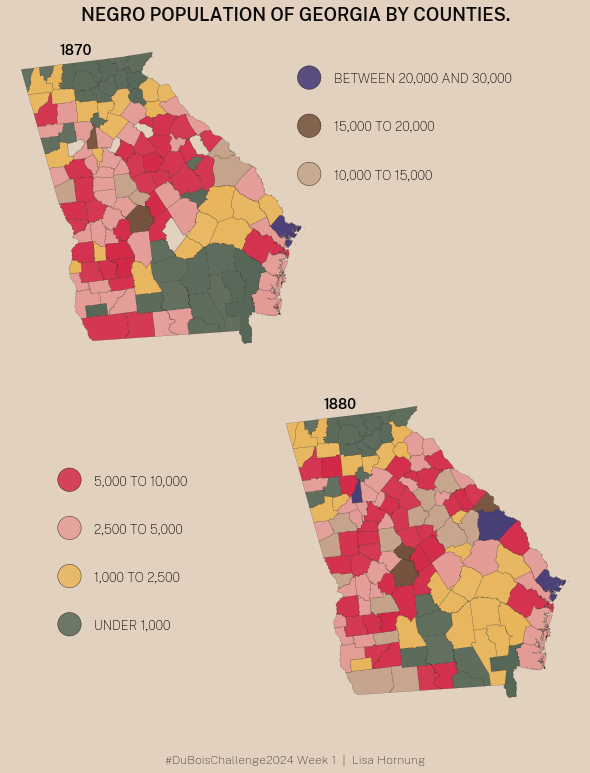

In [64]:
# create layout -------------------------------------------
layout = [["1870", "leg_top"], 
          ["leg_bottom", "1880"]]
fig,axs = plt.subplot_mosaic(layout, figsize=(8,12), empty_sentinel="___") 

# adjust subplots so their overlap slightly
plt.subplots_adjust(left=0.0, right=1, top=0.9, bottom=0.1, hspace=0.05, wspace=-0.15)

# set bg colour
fig.set_facecolor(bg_color)

# plot data  -------------------------------------------
gdf.plot(ax=axs["1870"], color=gdf["color_1870"], alpha=gdf["alpha"], edgecolor="black", lw=0.15)
gdf.plot(ax=axs["1880"], color=gdf["color_1880"], alpha=gdf["alpha"], edgecolor="black", lw=0.15)

# plot custom legends -------------------------------------------
kw = dict(marker='o', s=550, alpha=0.8, linewidths=0.45, ec="black")

# top legend
axs["leg_top"].scatter(y=[2,3,4,], x=[0.8]*3,  color=col_top, **kw)
for i, y_pos in enumerate([4,3,2]):
    axs["leg_top"].text(1, y_pos-0.1, label_top[i].upper(), fontsize=13, fontproperties=label_font,)

# bottom legend
axs["leg_bottom"].scatter(y=[0,1,2,3], x=[1]*4, color=col_bottom,**kw)
for i, y_pos in enumerate([3,2,1,0]):
    axs["leg_bottom"].text(1.2, y_pos-0.1, label_bottom[i].upper(), fontsize=13, fontproperties=label_font, )

# set axis limits
for ax in ["leg_top","leg_bottom"]:
    axs[ax].set_ylim(-2,5)
    axs[ax].set_xlim(0.5,3)

# general formatting -------------------------------------------
for ax in axs:
    axs[ax].axis("off")

# titles and footer -------------------------------------------
plt.figtext(0.5,0.91, "Negro population of Georgia by counties.".upper(), fontproperties=title_font, fontsize=18, ha="center", alpha=0.95)
plt.figtext(0.5,0.05, "#DuBoisChallenge2024 Week 1  |  Lisa Hornung", fontsize=12, ha="center", alpha=0.7, fontproperties=label_font,)
for ax in ["1870", "1880"]:
    axs[ax].set_title(ax, x=0.22, y=0.93, fontproperties=title_font, fontsize=14, )

# export -----------------
plt.savefig("dubois-challenge-2024-week1.png", bbox_inches='tight', dpi=120, pad_inches=0.5)

plt.show()

## Week 2

### Load data

In [2]:
df = pd.read_csv("challenge-02\\data.csv")

In [134]:
# Prepare data

# background area -------------
df_bg = pd.DataFrame()
#randomise value for a ripped paper effect
df_bg["Year"] = list(np.arange(1790, 1870.25, 0.25))  
df_bg["Free"] = [random.uniform(2.96, 3.03) for i in range(len(df_bg))]  

# data values ------------------------
df_free = df.copy().drop(columns="Slave")
df_free.loc[df_free.index[-1], 'Year'] = 1863
df_free.loc[df_free.index[-1], 'Free'] = 3 
# add randomise values from background
df_free= pd.concat([df_free, df_bg[df_bg["Year"]> 1863]])

### Visualise

In [4]:
colors = {"bg": "white",
          "red": "#D21F41"
          }

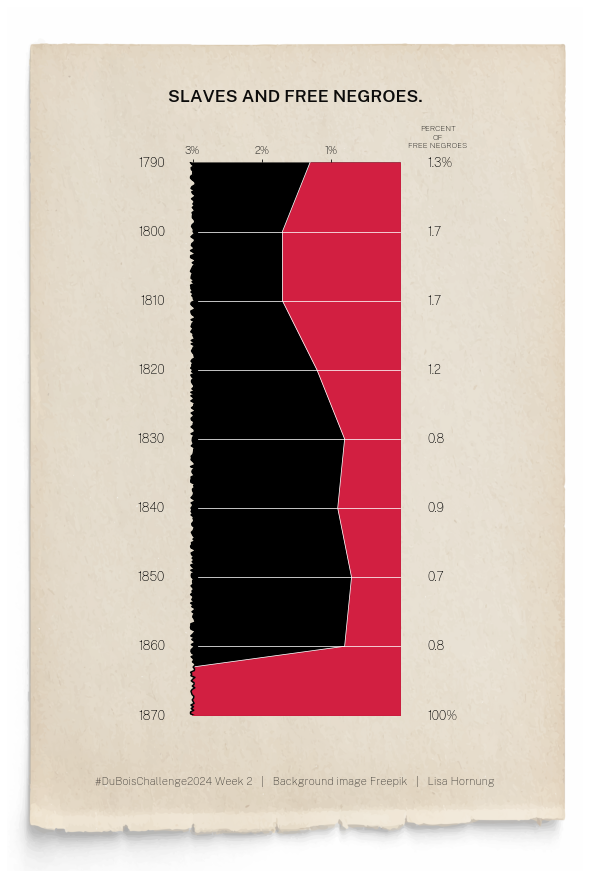

In [187]:
# layout  -----------------------------------
fig = plt.figure(figsize=(8,12))
fig.set_facecolor(colors["bg"])

# background image  -----------------------------------
imax = fig.add_axes([.0, .0, 1, 1])
image = plt.imread("challenge-02\\bg_2.jpg")
imax.imshow(image, alpha=0.5, zorder=1)
imax.axis("off")

# plot data -----------------------------------
ax = fig.add_axes([0.3, 0.18, 0.4, 0.64])

# Background fill
ax.fill_betweenx(data=df_bg, y="Year", x1="Free", x2=0, color="black", zorder=1)

# Proportion area and line
ax.fill_betweenx(data=df_free, y="Year", x1="Free", x2=0, color=colors["red"], zorder=1)
ax.plot(df_free["Free"], df_free["Year"],color=colors["bg"], zorder=1, linewidth=0.75 )

#outline 
ax.plot(df_bg["Free"], df_bg["Year"],color="black", zorder=2 )

# gridlines
for year in df["Year"][1:-1]:
    ax.plot([0,2.92], [year,year], zorder=3, color=colors["bg"], linewidth=0.75)

# axis formatting --------------------------------
ax.set_facecolor("None")
ax.invert_yaxis()
ax.invert_xaxis()
for pos in ["top", "bottom", "right", "left" ]:
    ax.spines[pos].set_visible(False)
ax.tick_params(axis='y', length = 0, which="both", pad=15)
ax.set_ylim( list(df["Year"])[-1], list(df["Year"])[0])

# xaxis
ax.xaxis.set_ticks_position('top')
ax.set_xticks([1,2,3], ["1%", "2%", "3%"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 10.5, fontproperties=label_font)

# ylabels
ax.set_yticklabels([])
y_labels = list(df["Free"])
y_labels[0] = str(y_labels[0]) + "%"
y_labels[-1] = str(100) + "%"
for i, year in enumerate(df["Year"]):
    ax.text(x=3.4, y=year, s=year, va="center", ha="right", fontproperties = label_font, fontsize=12.5)
    ax.text(x=-0.4, y=year, s=y_labels[i], va="center", ha="left",  fontproperties = label_font, fontsize=12.5)
ax.text(x=-0.55, y=1788, s="Percent\nof\nfree negroes".upper(), va="bottom", ha="center", fontproperties = label_font, fontsize=8)

# titles and footer -------------------------------------------
plt.figtext(0.5,0.89, "Slaves and free negroes.".upper(), fontproperties=title_font, fontsize=17.5, ha="center", alpha=0.95)
plt.figtext(0.5,0.1, "#DuBoisChallenge2024 Week 2   |   Background image Freepik   |   Lisa Hornung", fontsize=11, ha="center", alpha=0.7, fontproperties=label_font,)

# save
plt.savefig("dubois-challenge-2024-week2.png", bbox_inches='tight', dpi=120, pad_inches=0)

plt.show()